# assuignment 20

##### 1. Set the variable test1 to the string &#39;This is a test of the emergency text system,&#39; and save test1 to a  file named test.txt.

In [1]:
test1='This is a test of the emergency text system,'
f = open("test.txt", "w")
f.write(test1)
f.close()

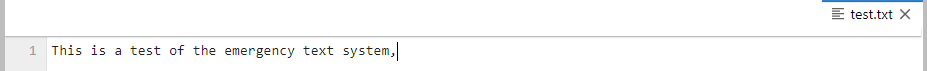

##### 2. Read the contents of the file test.txt into the variable test2. Is there a difference between test 1 and test 2?

In [2]:
f = open("test.txt", "r")
test2 = f.read()
f.close()
test2

'This is a test of the emergency text system,'

In [3]:
if test1 == test2:
    print("Variables are equal!")
else:
    print("Variables are NOT equal!")

Variables are equal!


##### 3. Create a CSV file called books.csv by using these lines:
title,author,year
The Weirdstone of Brisingamen,Alan Garner,1960
Perdido Street Station,China Miéville,2000
Thud!,Terry Pratchett,2005
The Spellman Files,Lisa Lutz,2007
Small Gods,Terry Pratchett,1992

In [28]:
message =""" title,author,year 
            The Weirdstone of Brisingamen,Alan Garner,1960 
            Perdido Street Station,China Miéville,2000 
            Thud!,Terry Pratchett,2005 
            The Spellman Files,Lisa Lutz,2007 
            Small Gods,Terry Pratchett,1992 """
message

' title,author,year \n            The Weirdstone of Brisingamen,Alan Garner,1960 \n            Perdido Street Station,China Miéville,2000 \n            Thud!,Terry Pratchett,2005 \n            The Spellman Files,Lisa Lutz,2007 \n            Small Gods,Terry Pratchett,1992 '

In [29]:
list(message.splitlines())

[' title,author,year ',
 '            The Weirdstone of Brisingamen,Alan Garner,1960 ',
 '            Perdido Street Station,China Miéville,2000 ',
 '            Thud!,Terry Pratchett,2005 ',
 '            The Spellman Files,Lisa Lutz,2007 ',
 '            Small Gods,Terry Pratchett,1992 ']

In [30]:
import csv

with open('books.csv', 'w') as f:  # open the file in the write mode  
    writer = csv.writer(f, delimiter="\n")         # creates the csv writer
    writer.writerow(message.splitlines())          # writes  row to the csv file
    
f.close()

##### 4. Use the sqlite3 module to create a SQLite database called books.db, and a table called books with these fields: title (text), author (text), and year (integer).

In [2]:
import sqlite3     # is in the system by default

try:
    db = sqlite3.connect("books.db")   # creates a .db file to save data in a structured format
                                       # this serves a connection to a local file named .db 
                                       # file can be saved in several places    
    c = db.cursor()                    # creates a pointer
    print("Successfully Connected to SQLite")
    
    # CREATES A TABLE
    c.execute("CREATE TABLE IF NOT EXISTS books(title TEXT, author TEXT, year INT)")  
    db.commit()
    print("SQLite table created")
    
    c.close()
    
    
except sqlite3.Error as error:
    print("Error while creating a sqlite table", error)

finally:
    if db:
        db.close()
        print("SQlite connection is closed")   

Successfully Connected to SQLite
SQLite table created
sqlite connection is closed


##### 5. Read books.csv and insert its data into the book table.

In [5]:
import sqlite3     # is in the system by default
import csv

try:
    db = sqlite3.connect("books.db")   # creates a .db file to save data in a structured format
                                       # this serves a connection to a local file named .db 
                                       # file can be saved in several places    
    c = db.cursor()                    # creates a pointer
    print("Successfully Connected to SQLite")
    
    # CREATES A TABLE
    c.execute("CREATE TABLE IF NOT EXISTS books(title TEXT, author TEXT, year INT)")  
    db.commit()
    print("SQLite table created")
    
    # Reads a file
    with open("books.csv") as csvfile:
        csvreader = csv.reader(csvfile,delimiter=",")
        next(csvreader)              # This skips the first row of the CSV file with the header.
        print("file successfully read")
        for row in csvreader:
            if(len(row)==3):         # eliminates any line with less than 3 values
                c.execute("INSERT INTO books VALUES (?, ?, ?)", (str(row[0]), str(row[1]), int(row[2])))

    
    c.close()
    
    
except sqlite3.Error as error:
    print("Error while creating a sqlite table", error)

finally:
    if db:
        db.close()
        print("SQlite connection is closed") 

Successfully Connected to SQLite
SQLite table created
file successfully read
SQlite connection is closed


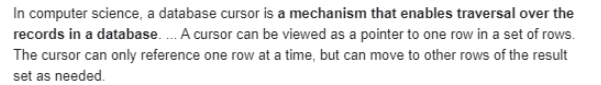

##### 6. Select and print the title column from the book table in alphabetical order.

In [6]:
import sqlite3     # is in the system by default
import csv

try:
    db = sqlite3.connect("books.db")   # creates a .db file to save data in a structured format
                                       # this serves a connection to a local file named .db 
                                       # file can be saved in several places    
    c = db.cursor()                    # creates a pointer
    print("Successfully Connected to SQLite")
    
    # CREATES A TABLE
    c.execute("CREATE TABLE IF NOT EXISTS books(title TEXT, author TEXT, year INT)")  
    db.commit()
    print("SQLite table created")
    
    # **** reads a file ***
    with open("books.csv") as csvfile:
        csvreader = csv.reader(csvfile,delimiter=",")
        next(csvreader)              # This skips the first row of the CSV file with the header.
        print("file successfully read")
        for row in csvreader:
            if(len(row)==3):         # eliminates any line with less than 3 values
                c.execute("INSERT INTO books VALUES (?, ?, ?)", (str(row[0]), str(row[1]), int(row[2])))

                
    # *** queries a database  ***
    c.execute("SELECT title FROM books ORDER BY title ASC")
    myresult = c.fetchall()
    print("Database successfully queried")
    for x in myresult:
        print(x)
    
    c.close()
    
    
except sqlite3.Error as error:
    print("Error while creating a sqlite table", error)

finally:
    if db:
        db.close()
        print("SQlite connection is closed") 

Successfully Connected to SQLite
SQLite table created
file successfully read
Database successfully queried
('            Perdido Street Station',)
('            Small Gods',)
('            The Spellman Files',)
('            The Weirdstone of Brisingamen',)
('            Thud!',)
SQlite connection is closed


##### 7. From the book table, select and print all columns in the order of publication.

In [7]:
import sqlite3     # is in the system by default
import csv

try:
    db = sqlite3.connect("books.db")   # creates a .db file to save data in a structured format
                                       # this serves a connection to a local file named .db 
                                       # file can be saved in several places    
    c = db.cursor()                    # creates a pointer
    print("Successfully Connected to SQLite")
    
    # CREATES A TABLE
    c.execute("CREATE TABLE IF NOT EXISTS books(title TEXT, author TEXT, year INT)")  
    db.commit()
    print("SQLite table created")
    
    # **** reads a file ***
    with open("books.csv") as csvfile:
        csvreader = csv.reader(csvfile,delimiter=",")
        next(csvreader)              # This skips the first row of the CSV file with the header.
        print("file successfully read")
        for row in csvreader:
            if(len(row)==3):         # eliminates any line with less than 3 values
                c.execute("INSERT INTO books VALUES (?, ?, ?)", (str(row[0]), str(row[1]), int(row[2])))

                
    # *** queries a database  ***
    c.execute("SELECT * FROM books ORDER BY year ASC")
    myresult = c.fetchall()
    print("Database successfully queried")
    for x in myresult:
        print(x)
    
    c.close()
    
    
except sqlite3.Error as error:
    print("Error while creating a sqlite table", error)

finally:
    if db:
        db.close()
        print("SQlite connection is closed") 

Successfully Connected to SQLite
SQLite table created
file successfully read
Database successfully queried
('            The Weirdstone of Brisingamen', 'Alan Garner', 1960)
('            Small Gods', 'Terry Pratchett', 1992)
('            Perdido Street Station', 'China Miéville', 2000)
('            Thud!', 'Terry Pratchett', 2005)
('            The Spellman Files', 'Lisa Lutz', 2007)
SQlite connection is closed


##### 8. Use the sqlalchemy module to connect to the sqlite3 database books.db that you just made in exercise 6.

In [10]:
from sqlalchemy import create_engine as ce
engine = ce('sqlite:///books.db')
connection = engine.connect()
print(engine.table_names())

['books']


##### 9. Install the Redis server and the Python redis library (pip install redis) on your computer. Create a Redis hash called test with the fields count (1) and name (&#39;Fester Bestertester&#39;). Print all the fields for test.

In [12]:
!pip install redis --user

  Using cached redis-4.2.1-py3-none-any.whl (225 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


##### https://riptutorial.com/redis/example/29962/installing-and-running-redis-server-on-windows
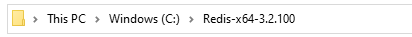

In [3]:
import redis

# instanciate the object, tries to connect to the redis server running in your local machine
# but you can explicitly give the host and the port 
test=redis.Redis(host='localhost',port=6379)

test.set("count",1)
test.set("name","Fester Besterterster")

print(test.get("count"))
print(test.get("name"))

b'1'
b'Fester Besterterster'


In [8]:
test1=redis.Redis(host='localhost',port=6379)
test1.mset({"count":1,"name":"Fester Besterterster"})
print(test1.mget("count","name"))

[b'1', b'Fester Besterterster']


In [10]:
test1.keys('*')   # find the existing keys

[b'name', b'count']

##### 10. Increment the count field of test and print it.

In [11]:
print(test1.mget("count","name"))
test1.incr("count")
print(test1.mget("count","name"))


[b'1', b'Fester Besterterster']
[b'2', b'Fester Besterterster']


In [12]:
print(test1.mget("count","name"))
test1.decr("count")
print(test1.mget("count","name"))

[b'2', b'Fester Besterterster']
[b'1', b'Fester Besterterster']
